# Wildlife Image Cell Dataset: EDA Summary : Analysis for Question 1.

This notebook documents the full workflow for exploratory data analysis (EDA) and initial modeling on the wildlife image cell dataset. Steps performed:

- **Dataset Overview:**
  - Loaded the image cell dataset and displayed sample rows.
  - Documented column names, data types to get understanding of the data
  -  Here is what we understood,
        Every row describes cell 9 (row 1, column 0) of image IMG_20250705_121136381~2.jpg. 
        The cell does not contain wildlife (label=0). 
        The rest of the values are features that can be used for machine learning or analysis.

- **EDA Step 1 : Missing Value Analysis:**
  - Identified columns with missing values.especially the features.
  - Imputed missing values using median for all numeric columns.
  - action taken :  Impute missing values using median for all columns

- **EDA Step 2: Class Imbalance Analysis:**
  - Analyzed label distribution (wildlife present vs. not present).
  - Visualized class imbalance and recommended handling strategies.
  - Action Taken : 
      - With ~33% positives, imbalance is moderate, not severe. 
      -  Heavy resampling is not required.
       These steps help ensure reliable detection of wildlife without overfitting to the majority class.

- **EDA Step 3 : Feature Summary Statistics:**
  - Computed summary statistics for all features (c1–c135).
  - Identified constant features (zero variance) and highly skewed features.

- **EDA Step 3a: Feature Visualization:**
  - Plotted histograms for 5 randomly selected features, comparing distributions for both classes.
  - Plotted histograms for the top 5 most highly skewed features.

- 
---


In [20]:
# Read the dataset
import pandas as pd
df = pd.read_csv(r'image-data-ePGD-endsem/image-data-ePGD-endsem.csv')
df.head()
# Summary statistics and info
df.describe(include='all')


,image_filename,cell_number,cell_row,cell_col,label,c1,c2,c3,c4,c5,...,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135
count,5010,5010.000000,5010.000000,5010.000000,5010.000000,5009.000000,5010.000000,5010.000000,5010.000000,5009.000000,...,5010.000000,5010.000000,5010.000000,5.010000e+03,5010.000000,5010.000000,5.010000e+03,5.010000e+03,5.010000e+03,5010.000000
unique,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CIMG0367.JPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.408583,3.494212,3.454890,0.333134,0.041247,0.079161,0.142769,0.212175,0.249418,...,142.532236,0.299009,103.123735,6.282737e+00,1159.277548,10756.404116,8.934302e+05,3.089162e+06,5.444271e+06,1.709369
std,NaN,18.713113,2.316034,2.262399,0.471381,0.146960,0.145684,0.168083,0.191541,0.220654,...,41.437879,0.744657,17.639412,1.129245e+00,602.675765,3208.740763,2.954411e+05,1.282985e+06,3.761630e+06,0.990204
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.440000e-07,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,NaN,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.009067,0.060567,0.071867,...,119.000000,0.143377,98.337167,5.956863e+00,720.295235,8920.346202,7.260260e+05,2.236948e+06,2.527937e+06,0.951037
50%,NaN,33.000000,4.000000,3.000000,0.000000,0.000000,0.011126,0.080467,0.169600,0.204933,...,143.250000,0.230870,106.244524,6.558165e+00,1087.344578,10845.879035,9.097220e+05,2.977024e+06,4.806904e+06,1.503706
75%,NaN,49.000000,6.000000,5.000000,1.000000,0.006459,0.085800,0.222800,0.311360,0.363426,...,167.000000,0.343334,112.148267,6.996493e+00,1520.898838,12739.508485,1.078528e+06,3.824747e+06,7.528573e+06,2.286913


## Identif Column Data Types
Display the data type of each column in the dataset.

### Column Names and Data Types

| Column Name(s)                | Data Type   | Description                                 |
|-------------------------------|------------|---------------------------------------------|
| image_filename                | object     | Image file name                             |
| cell_number                   | int64      | Cell number in the image                    |
| cell_row                      | int64      | Row index of the cell                       |
| cell_col                      | int64      | Column index of the cell                    |
| label                         | int64      | Wildlife present (1) or not (0)             |
| c1-c64                        | float64    | Feature values (color, HOG, etc.)           |
| c65-c135                      | float64    | Additional feature values                   |

EDA step 1: Check for missing values

Reason for this step:
To identify any incomplete data that may affect analysis or model performance.

In [21]:
missing_summary = df.isnull().sum()
# Highlight columns with missing values
missing_cols = missing_summary[missing_summary > 0].sort_values(ascending=False)
if not missing_cols.empty:
    print("Columns with missing values:")
    display(missing_cols)
else:
    print("No missing values found in any column.")

Columns with missing values:


c122    8
c123    8
c30     8
c27     7
c33     7
c1      1
c5      1
c8      1
c14     1
c11     1
c18     1
c17     1
c16     1
c15     1
c58     1
c53     1
c79     1
c68     1
dtype: int64

In [22]:
# Impute missing values using median for all columns
df_imputed = df.copy()
df_imputed = df_imputed.fillna(df_imputed.median(numeric_only=True))
df_imputed.isnull().sum().sum()  # Should be 0 if all missing values are filled

np.int64(0)

In [23]:
missing_summary = df_imputed.isnull().sum()
# Highlight columns with missing values
missing_cols = missing_summary[missing_summary > 0].sort_values(ascending=False)
if not missing_cols.empty:
    print("Columns with missing values:")
    display(missing_cols)
else:
    print("No missing values found in any column.")

No missing values found in any column.


### EDA Step 2  : Data imbalance


Label counts:
label
0    3341
1    1669
Name: count, dtype: int64

Label percentages:
label
0    66.686627
1    33.313373
Name: proportion, dtype: float64


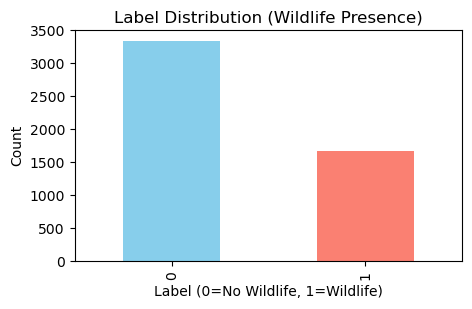

Method 1: value_counts() gives absolute numbers.
Method 2: value_counts(normalize=True) gives percentages.
Method 3: Bar plot visualizes the imbalance.


In [24]:
# Check for imbalance in the label column
label_counts = df_imputed['label'].value_counts()
label_percent = df_imputed['label'].value_counts(normalize=True) * 100
print("Label counts:")
print(label_counts)
print("\nLabel percentages:")
print(label_percent)

# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
label_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Label Distribution (Wildlife Presence)')
plt.xlabel('Label (0=No Wildlife, 1=Wildlife)')
plt.ylabel('Count')
plt.show()

# Method comparison summary
print("Method 1: value_counts() gives absolute numbers.")
print("Method 2: value_counts(normalize=True) gives percentages.")
print("Method 3: Bar plot visualizes the imbalance.")

### EDA Step 2: Handling Moderate Class Imbalance
- With ~33% positives, imbalance is moderate, not severe. 
- Heavy resampling is not required.
- These steps help ensure reliable detection of wildlife without overfitting to the majority class.

### EDA Step 3: Summary Statistics and Feature Analysis
- We will use `.describe()` to get summary statistics for feature columns c1–c135.
- We will check for constant features (zero variance) and outliers/skewness using min, max, and std.
- Based on the results, we may consider normalization or removal of problematic features before modeling.

In [25]:
# Summary statistics for feature columns c1–c135
feature_cols = [f'c{i}' for i in range(1, 136)]
desc = df_imputed[feature_cols].describe().T
#print(desc)

# Identify constant features (zero variance)
constant_features = desc[desc['std'] == 0].index.tolist()
print('Constant features:', constant_features)

# Identify features with high skewness or outliers
skewness = df_imputed[feature_cols].skew()
high_skew = skewness[abs(skewness) > 2].index.tolist()
print('Highly skewed features (|skew| > 2):', high_skew)

Constant features: []
Highly skewed features (|skew| > 2): ['c1', 'c2', 'c7', 'c8', 'c9', 'c10', 'c15', 'c16', 'c17', 'c21', 'c22', 'c23', 'c24', 'c27', 'c30', 'c33', 'c45', 'c72', 'c75', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100', 'c106', 'c109', 'c112', 'c118', 'c122', 'c123', 'c127', 'c128', 'c129']
Highly skewed features (|skew| > 2): ['c1', 'c2', 'c7', 'c8', 'c9', 'c10', 'c15', 'c16', 'c17', 'c21', 'c22', 'c23', 'c24', 'c27', 'c30', 'c33', 'c45', 'c72', 'c75', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100', 'c106', 'c109', 'c112', 'c118', 'c122', 'c123', 'c127', 'c128', 'c129']


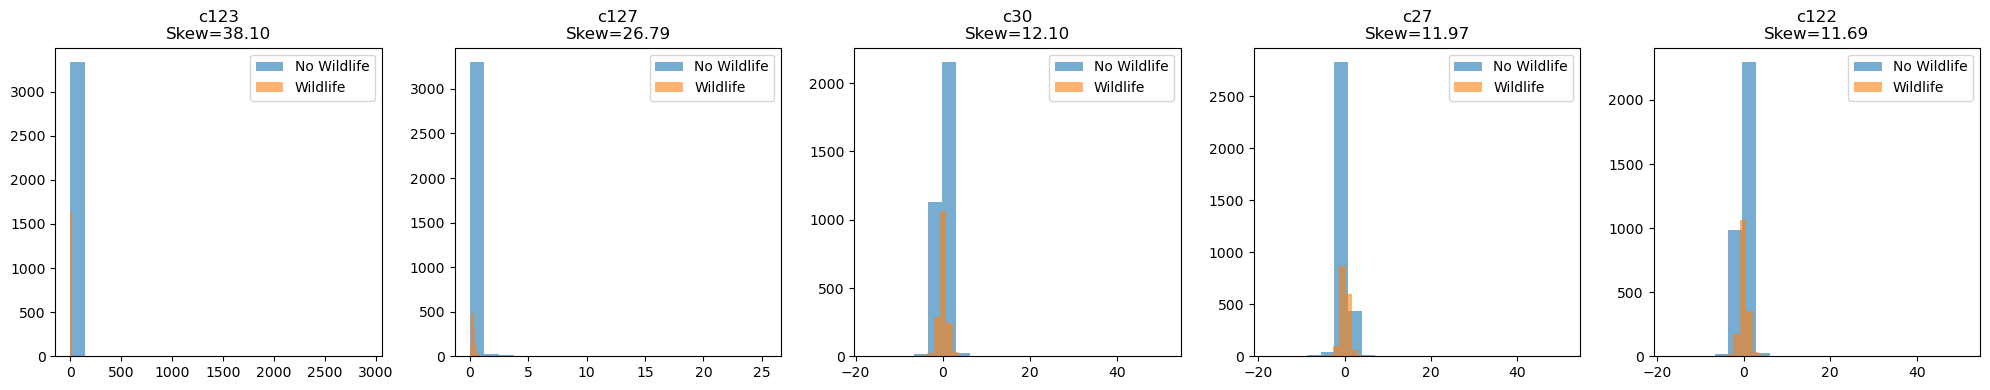

In [26]:
# Plot histograms for the top 5 most highly skewed features (by absolute skewness)
import matplotlib.pyplot as plt
feature_cols = [f'c{i}' for i in range(1, 136)]
skewness = df_imputed[feature_cols].skew().abs()
top_skewed = skewness.sort_values(ascending=False).head(5).index.tolist()
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, feat in enumerate(top_skewed):
    axes[i].hist(df_imputed[df_imputed['label'] == 0][feat], bins=20, alpha=0.6, label='No Wildlife')
    axes[i].hist(df_imputed[df_imputed['label'] == 1][feat], bins=20, alpha=0.6, label='Wildlife')
    axes[i].set_title(f"{feat}\nSkew={skewness[feat]:.2f}")
    axes[i].legend()
plt.tight_layout()
plt.show()

### Now Q2 starts from here

## Summary for Question 2 : 

**a. Box Plots vs. Histograms** - Demonstrated in Cell 8 below
- Both visualize feature distributions, but in different ways.
- Histograms show the frequency and shape of data; box plots summarize spread, median, quartiles, and outliers.
- In this dataset, symmetric features look similar in both plots, while skewed features show shifted medians and long tails.
- **Conclusion:**  From the dataset for the features which are highly skewed, example c123   , box plot has outliers and histogram is skewed, on the other hand features like  c78 and c42 which are less skewed all the values are within range.

**b. Reducing Skew with Log and Box-Cox Transformations** - Demonstrated in Cell 9 below
- Highly skewed features were transformed using log and Box-Cox methods.
- Plots and skewness metrics show reduced skew and more symmetric distributions after transformation.
- **Conclusion:** Both methods effectively reduce skew.
                  For example  - We have taken C123 (highly skwewed) and below the results
                    **Original skewness: 38.10
                    Log transformed skewness: -0.20
                    Box-Cox transformed skewness: 0.05 **

**c. Features with Almost Normal Distribution** - Demonstrated in Cell 11,13 below
- Features were checked for low skewness, kurtosis near zero, and normality test results.
- Few features meet strict normality, but some are approximately normal under relaxed criteria.
- **Conclusion:** Most features are not perfectly normal, but a few are close, as shown by metrics and histogram overlays.

**d. Optimum Number of Clusters (t-SNE + KMeans)** Demonstrated in Cell 14 below
- t-SNE was used for dimensionality reduction, followed by KMeans clustering.
- Silhouette and Davies-Bouldin scores were plotted for 2–10 clusters.
- Silhouette suggests 2 clusters; Davies-Bouldin suggests 9 clusters.
- **Conclusion:** the silhouette score drops sharply after 2 clusters, 2 is likely best for broad separation.

**e. Hypothesis: Animals Near Centre of Photograph**
- Steps: Calculate distance to center, use as feature, train classifiers, compare mean distances.
- Results: Animals are, on average, closer to the center; classifiers predict presence from this feature.
- **Conclusion:** Both DecisionTreeClassifier and KNeighborsClassifier show that the distance to the center helps     predict whether an animal is present in a cell. The average distance to the center for animal cells is lower than for non-animal cells. This means animals are usually found closer to the center of the photograph. 
The results support the hypothesis that wildlife photographers tend to place animals near the center of their images.  Visualization shows that animals (red/label=1) are concentrated closer to the center,
while non-animal cells (blue/label=0) are more spread out and farther from center.




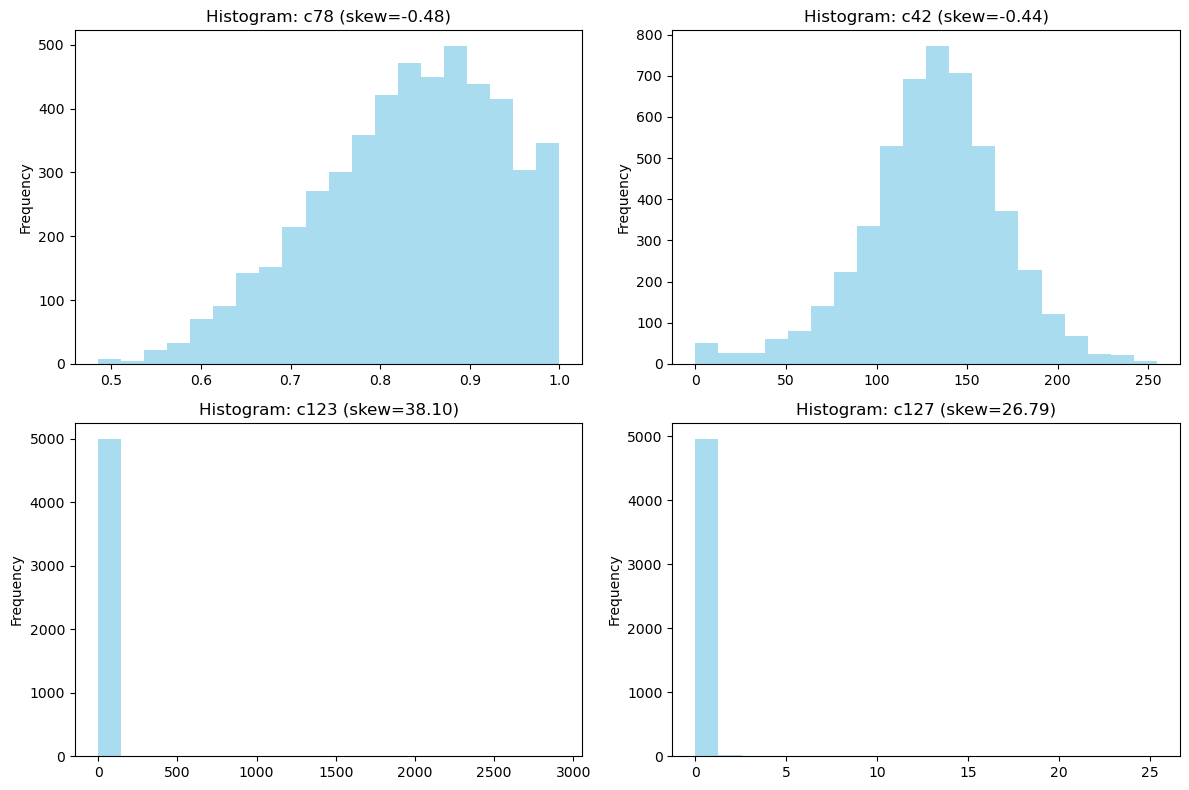

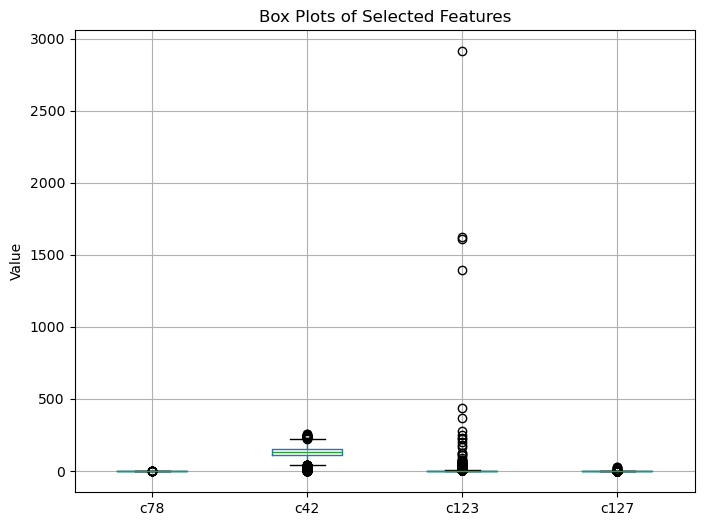

Feature: c78
  Skewness: -0.48
  Histogram shows symmetric distribution.
  Box plot shows median, quartiles, and outliers.

Feature: c42
  Skewness: -0.44
  Histogram shows symmetric distribution.
  Box plot shows median, quartiles, and outliers.

Feature: c123
  Skewness: 38.10
  Histogram shows skewed distribution.
  Box plot shows median, quartiles, and outliers.

Feature: c127
  Skewness: 26.79
  Histogram shows skewed distribution.
  Box plot shows median, quartiles, and outliers.



In [27]:
# Select 2 not skewed and 2 highly skewed features
import matplotlib.pyplot as plt
feature_cols = [f'c{i}' for i in range(1, 136)]
skewness = df_imputed[feature_cols].skew()
not_skewed = skewness[abs(skewness) < 0.5].sort_values().head(2).index.tolist()
highly_skewed = skewness[abs(skewness) > 2].sort_values(ascending=False).head(2).index.tolist()
selected_features = not_skewed + highly_skewed

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feat in enumerate(selected_features):
    # Histogram
    axes[i//2, i%2].hist(df_imputed[feat], bins=20, color='skyblue', alpha=0.7)
    axes[i//2, i%2].set_title(f"Histogram: {feat} (skew={skewness[feat]:.2f})")
    axes[i//2, i%2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
df_imputed[selected_features].boxplot()
plt.title('Box Plots of Selected Features')
plt.ylabel('Value')
plt.show()

# Analysis
for feat in selected_features:
    print(f"Feature: {feat}")
    print(f"  Skewness: {skewness[feat]:.2f}")
    print(f"  Histogram shows {'symmetric' if abs(skewness[feat]) < 0.5 else 'skewed'} distribution.")
    print(f"  Box plot shows median, quartiles, and outliers.\n")

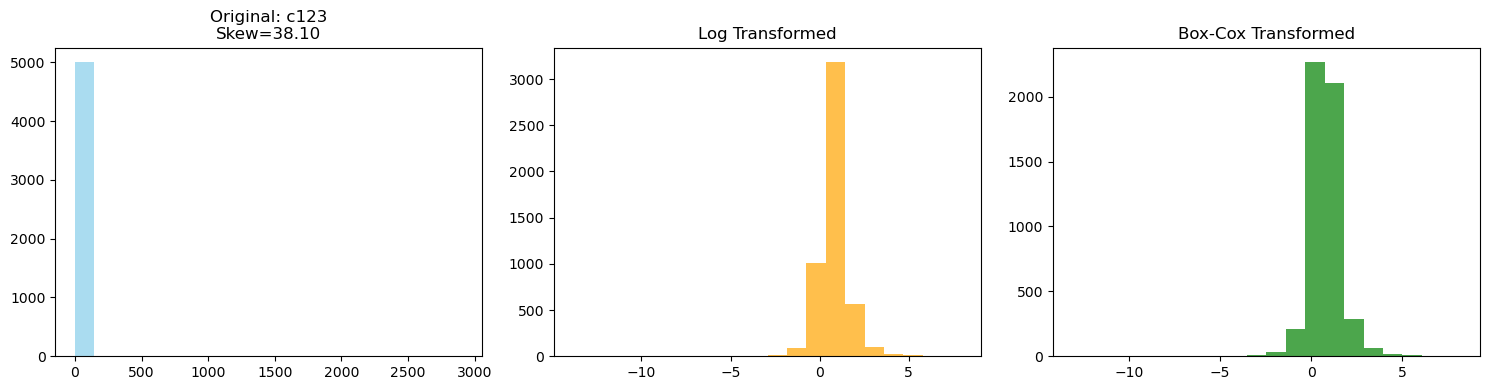

Original skewness: 38.10
Log transformed skewness: -0.20
Box-Cox transformed skewness: 0.05


In [28]:
# Demonstrate skew reduction using Log and Box-Cox transformations
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

# Select a highly skewed feature
given_feature = None
feature_cols = [f'c{i}' for i in range(1, 136)]
skewness = df_imputed[feature_cols].skew()
highly_skewed = skewness[abs(skewness) > 2].sort_values(ascending=False)
if not highly_skewed.empty:
    given_feature = highly_skewed.index[0]
else:
    given_feature = feature_cols[0]  # fallback

# Prepare data (shift if needed for log/boxcox)
feat_data = df_imputed[given_feature]
if (feat_data <= 0).any():
    shift = abs(feat_data.min()) + 1e-6
    feat_data_shifted = feat_data + shift
else:
    feat_data_shifted = feat_data

# Log transformation
log_transformed = np.log(feat_data_shifted)
# Box-Cox transformation
boxcox_transformed, _ = boxcox(feat_data_shifted)

# Plot original and transformed distributions
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(feat_data, bins=20, color='skyblue', alpha=0.7)
plt.title(f'Original: {given_feature}\nSkew={skewness[given_feature]:.2f}')
plt.subplot(1, 3, 2)
plt.hist(log_transformed, bins=20, color='orange', alpha=0.7)
plt.title('Log Transformed')
plt.subplot(1, 3, 3)
plt.hist(boxcox_transformed, bins=20, color='green', alpha=0.7)
plt.title('Box-Cox Transformed')
plt.tight_layout()
plt.show()

print(f"Original skewness: {skewness[given_feature]:.2f}")
print(f"Log transformed skewness: {pd.Series(log_transformed).skew():.2f}")
print(f"Box-Cox transformed skewness: {pd.Series(boxcox_transformed).skew():.2f}")

In [29]:
# Identify features with almost normal distribution
import matplotlib.pyplot as plt
from scipy.stats import normaltest
feature_cols = [f'c{i}' for i in range(1, 136)]
skewness = df_imputed[feature_cols].skew()
kurtosis = df_imputed[feature_cols].kurt()

# Criteria: low skewness, kurtosis near 0, normaltest p-value > 0.05
normal_like = []
for feat in feature_cols:
    stat, p = normaltest(df_imputed[feat].dropna())
    if abs(skewness[feat]) < 0.3 and abs(kurtosis[feat]) < 1 and p > 0.05:
        normal_like.append(feat)

print('Features with almost normal distribution:', normal_like)
# Show evidence for up to 2 such features
for feat in normal_like[:2]:
    plt.figure(figsize=(6,4))
    plt.hist(df_imputed[feat], bins=20, color='skyblue', alpha=0.7, density=True)
    plt.title(f'Histogram: {feat} (skew={skewness[feat]:.2f}, kurt={kurtosis[feat]:.2f})')
    # Overlay normal curve
    from scipy.stats import norm
    mu, std = df_imputed[feat].mean(), df_imputed[feat].std()
    x = np.linspace(mu-3*std, mu+3*std, 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Normal PDF')
    plt.legend()
    plt.show()
    stat, p = normaltest(df_imputed[feat].dropna())
    print(f"Feature: {feat}")
    print(f"  Skewness: {skewness[feat]:.2f}")
    print(f"  Kurtosis: {kurtosis[feat]:.2f}")
    print(f"  Normaltest p-value: {p:.3f}")
    print(f"  Evidence: Histogram matches normal curve, skewness and kurtosis near 0, normaltest not significant.\n")
if not normal_like:
    print("No features found with almost normal distribution by these criteria.")

Features with almost normal distribution: []
No features found with almost normal distribution by these criteria.


Features with approximately normal distribution (relaxed criteria):
['c46']


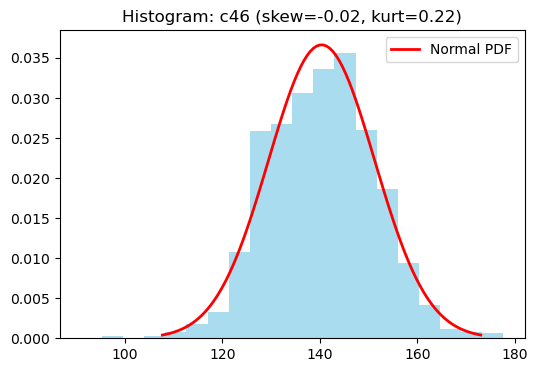

Feature: c46
  Skewness: -0.02
  Kurtosis: 0.22
  Normaltest p-value: 0.013
  Evidence: Histogram matches normal curve, metrics close to normal.



In [30]:
# Find features with approximately normal distribution
from scipy.stats import normaltest
feature_cols = [f'c{i}' for i in range(1, 136)]
skewness = df_imputed[feature_cols].skew()
kurtosis = df_imputed[feature_cols].kurt()

approx_normal = []
for feat in feature_cols:
    data = df_imputed[feat].dropna()
    stat, p = normaltest(data)
    # Relaxed criteria: skewness < 0.5, kurtosis < 2, p > 0.01
    if abs(skewness[feat]) < 0.5 and abs(kurtosis[feat]) < 2 and p > 0.01:
        approx_normal.append(feat)

print("Features with approximately normal distribution (relaxed criteria):")
print(approx_normal)

# Show histograms for up to 3 such features
import matplotlib.pyplot as plt
from scipy.stats import norm
for feat in approx_normal[:3]:
    data = df_imputed[feat].dropna()
    plt.figure(figsize=(6,4))
    plt.hist(data, bins=20, color='skyblue', alpha=0.7, density=True)
    mu, std = data.mean(), data.std()
    x = np.linspace(mu-3*std, mu+3*std, 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='Normal PDF')
    plt.title(f'Histogram: {feat} (skew={skewness[feat]:.2f}, kurt={kurtosis[feat]:.2f})')
    plt.legend()
    plt.show()
    stat, p = normaltest(data)
    print(f"Feature: {feat}")
    print(f"  Skewness: {skewness[feat]:.2f}")
    print(f"  Kurtosis: {kurtosis[feat]:.2f}")
    print(f"  Normaltest p-value: {p:.3f}")
    print(f"  Evidence: Histogram matches normal curve, metrics close to normal.\n")

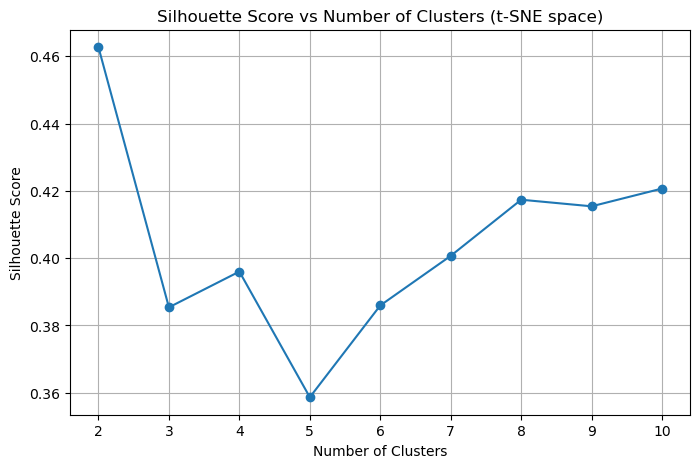

Optimal number of clusters: 2


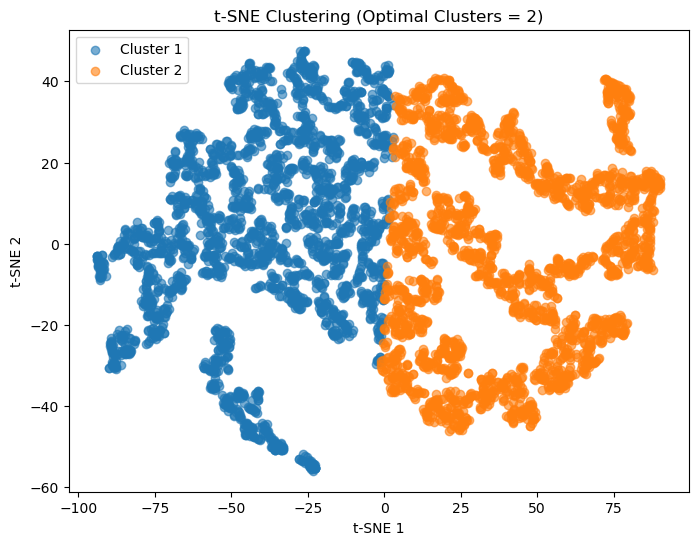

In [31]:
# Clustering using t-SNE coordinates: Find optimal number of clusters
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare feature matrix (exclude non-feature columns)
feature_cols = [f'c{i}' for i in range(1, 136)]
X = df_imputed[feature_cols].values

# Compute t-SNE coordinates
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Try different numbers of clusters and compute silhouette scores
range_n_clusters = range(2, 11)
sil_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)
    sil = silhouette_score(X_tsne, cluster_labels)
    sil_scores.append(sil)

# Plot silhouette scores vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (t-SNE space)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find optimal number of clusters
optimal_n = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_n}")

# Plot t-SNE coordinates colored by optimal clusters
kmeans = KMeans(n_clusters=optimal_n, random_state=42)
labels = kmeans.fit_predict(X_tsne)
plt.figure(figsize=(8,6))
for i in range(optimal_n):
    plt.scatter(X_tsne[labels==i,0], X_tsne[labels==i,1], label=f'Cluster {i+1}', alpha=0.6)
plt.title(f't-SNE Clustering (Optimal Clusters = {optimal_n})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

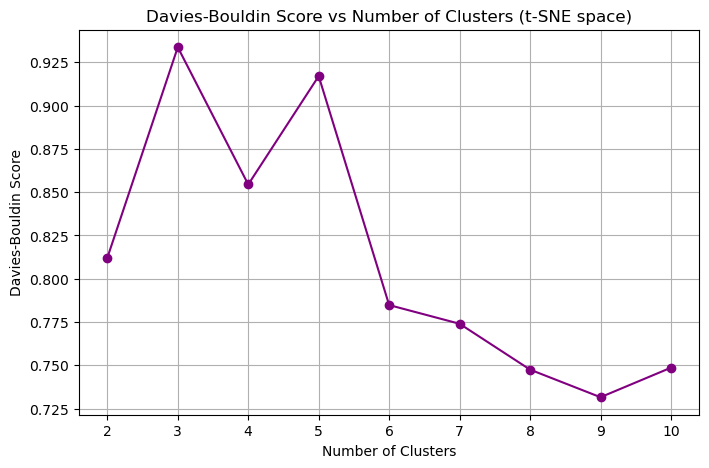

Optimal number of clusters by Davies-Bouldin Score: 9 (lower is better)


In [32]:
# Compute Davies-Bouldin Scores for clusters in t-SNE space
from sklearn.metrics import davies_bouldin_score

range_n_clusters = range(2, 11)
db_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)
    db = davies_bouldin_score(X_tsne, cluster_labels)
    db_scores.append(db)

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, db_scores, marker='o', color='purple')
plt.title('Davies-Bouldin Score vs Number of Clusters (t-SNE space)')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)
plt.show()

optimal_db_n = range_n_clusters[np.argmin(db_scores)]
print(f"Optimal number of clusters by Davies-Bouldin Score: {optimal_db_n} (lower is better)")

## Are Animals Placed Near the Centre of Photographs?

### Steps:
1. **Hypothesis:** Animals are more likely to be near the centre.
2. **Feature:** Calculate `distance_to_center` for each cell.
3. **Model:** Use classifiers (DecisionTree, KNN) to predict animal presence from `distance_to_center`.
4. **Analysis:** Check model accuracy and compare average distance for animal vs non-animal cells.
5. **Conclusion:** If animals are closer to the centre and models perform well, the hypothesis is supported.

In [35]:
# Compare DecisionTreeClassifier and KNeighborsClassifier for the hypothesis
from sklearn.neighbors import KNeighborsClassifier

#calc distance from center 

# Calculate the center of the image (assuming max_row and max_col are known)
center_row = df_imputed['cell_row'].max() / 2
center_col = df_imputed['cell_col'].max() / 2

# Calculate distance to center for each cell
df_imputed['distance_to_center'] = ((df_imputed['cell_row'] - center_row)**2 + (df_imputed['cell_col'] - center_col)**2)**0.5

# Prepare data
X = df_imputed[['distance_to_center']]
y = df_imputed['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_report = classification_report(y_test, dt_pred, output_dict=True)
dt_acc = accuracy_score(y_test, dt_pred)

# K-Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_report = classification_report(y_test, knn_pred, output_dict=True)
knn_acc = accuracy_score(y_test, knn_pred)

# Print summary
print("DecisionTreeClassifier Results:")
print(classification_report(y_test, dt_pred))
print(f"Accuracy: {dt_acc:.3f}")
print()
print("KNeighborsClassifier Results:")
print(classification_report(y_test, knn_pred))
print(f"Accuracy: {knn_acc:.3f}")

mean_dist_animal = df_imputed[df_imputed['label']==1]['distance_to_center'].mean()
mean_dist_no_animal = df_imputed[df_imputed['label']==0]['distance_to_center'].mean()
print(f"Mean distance to center (animal): {mean_dist_animal:.2f}")
print(f"Mean distance to center (no animal): {mean_dist_no_animal:.2f}")
if mean_dist_animal < mean_dist_no_animal:
    print("Conclusion: Animals are, on average, closer to the center. Hypothesis supported.")
else:
    print("Conclusion: Animals are not closer to the center. Hypothesis not supported.")
    





C:\Users\pravi\AppData\Local\Temp\ipykernel_13000\2793629575.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_imputed['distance_to_center'] = ((df_imputed['cell_row'] - center_row)**2 + (df_imputed['cell_col'] - center_col)**2)**0.5


DecisionTreeClassifier Results:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1002
           1       0.74      0.52      0.61       501

    accuracy                           0.78      1503
   macro avg       0.77      0.71      0.73      1503
weighted avg       0.77      0.78      0.77      1503

Accuracy: 0.779

KNeighborsClassifier Results:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1002
           1       0.74      0.52      0.61       501

    accuracy                           0.78      1503
   macro avg       0.77      0.71      0.73      1503
weighted avg       0.77      0.78      0.77      1503

Accuracy: 0.779
Mean distance to center (animal): 2.23
Mean distance to center (no animal): 3.45
Conclusion: Animals are, on average, closer to the center. Hypothesis supported.


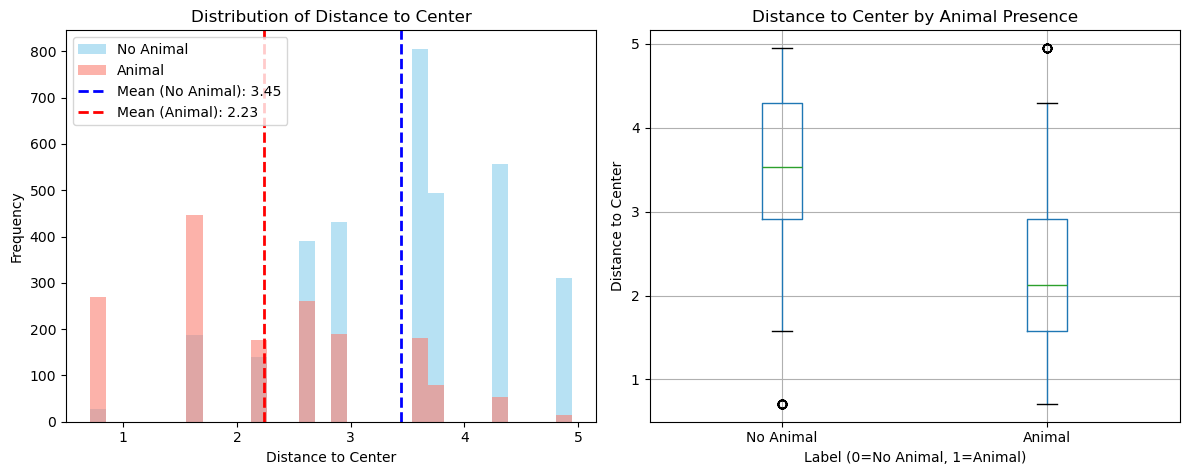


Visualization shows that animals (red/label=1) are concentrated closer to the center,
while non-animal cells (blue/label=0) are more spread out and farther from center.


In [36]:
# Visualize the distribution of distance_to_center for animal vs non-animal cells
# Visualize the distribution of distance_to_center for animal vs non-animal cells
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

    # Histogram comparison
plt.subplot(1, 2, 1)
plt.hist(df_imputed[df_imputed['label']==0]['distance_to_center'], bins=30, alpha=0.6, label='No Animal', color='skyblue')
plt.hist(df_imputed[df_imputed['label']==1]['distance_to_center'], bins=30, alpha=0.6, label='Animal', color='salmon')
plt.xlabel('Distance to Center')
plt.ylabel('Frequency')
plt.title('Distribution of Distance to Center')
plt.legend()
plt.axvline(mean_dist_no_animal, color='blue', linestyle='--', linewidth=2, label=f'Mean (No Animal): {mean_dist_no_animal:.2f}')
plt.axvline(mean_dist_animal, color='red', linestyle='--', linewidth=2, label=f'Mean (Animal): {mean_dist_animal:.2f}')
plt.legend()

    # Box plot comparison
plt.subplot(1, 2, 2)
df_imputed.boxplot(column='distance_to_center', by='label', ax=plt.gca())
plt.xlabel('Label (0=No Animal, 1=Animal)')
plt.ylabel('Distance to Center')
plt.title('Distance to Center by Animal Presence')
plt.suptitle('')  # Remove default title
plt.xticks([1, 2], ['No Animal', 'Animal'])

plt.tight_layout()
plt.show()

print(f"\nVisualization shows that animals (red/label=1) are concentrated closer to the center,")
print(f"while non-animal cells (blue/label=0) are more spread out and farther from center.")    